# Project proposal

---

Group name: David Riethmann, Doreen Mack

---


## Introduction

For our project we have chosen a dataset about the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in southern California. Our motivation is to find patterns and trends within the data and define factors and potential predictors associated with the growth of Dalmatian toadflax and the spread of weevil populations. 

Dalmatian toadflax is an invasive plant that is considered an undesirable weed in southern California. It can thrive and spread rapidly in a variety of ecosystems, including grasslands and roadsides. Invasive plants such as Dalmatian toadflax can cause ecological problems. On the on hand, it can displace native plants and as a result reduce biodiversity. It can also have an impact on the availability of habitat for native animals as the dominance of Dalmatian toadflax can disrupt the strucutre and function of ecosystems. On the other hand, we have to think of the soil composition. Invasive plants can alter the soil by removing nutrients which can have an impact on the native vegetation. Moreover, Dalmatian toadflax can tend to accumulate dry material, which can increase fire hazard.

Therefore, attempts are being made to control the spread of Dalmatian toadflax using weevil populations. They were released in the investigated area of southern California.

General research questions:
- Which aspects can help predict the total main stem length?
- Are plants that are infested by weevils really more likely to remain smaller?

Our hypothesis is that the spread of weevil populations really contributes to the reduction of Dalmatian toadflax vegetation in this area.


## Data description

Each observation in the datasets represents a plant in the investigated area. The dataset was originally collected by Lincoln Smith starting in 2008 and published by the Agricultural Research Service (Department of Agriculture).
Every year an observational study was conducted on six different sites within the investigated area with approximately 7-78 observations per site and year (see below). The plants were collected, examined, measured and dissected in the labratory.

Stem count overview per year and site:

In [6]:
import pandas as pd
df = pd.read_csv('../data/raw/dissections_2012_HV.csv')
df.groupby(['year', 'site'])['stem #'].count()

year  site      
2012  Center        50
      East          50
      USFS-North    50
      USFS-South    50
      USFS-West     50
      West          50
2013  Center        19
      East          20
      USFS-North    20
      USFS-South    20
      USFS-West     20
      West          20
2014  Center        63
      East          53
      USFS-North     9
      USFS-South    15
      USFS-West     27
      West          78
2015  Center        25
      East          25
      USFS-North    10
      USFS-South    10
      USFS-West     10
      West          25
2016  Center        15
      East          17
      USFS-North    15
      USFS-South    15
      USFS-West     15
      West          15
2017  Center        15
      East          15
      USFS-North    15
      USFS-South     7
      USFS-West     15
      West          15
2018  Center        20
      East          19
      USFS-North    20
      USFS-South    23
      USFS-West     21
      West          20
Name: stem #, dty


## Analysis approach

First, we want to perform a **linear regression**.

The response variable is determined as Y = main steam length and is defined as the length of stem, excluding side branches. We want to predict the total main stem length for any plant. 

Possible predictor variables, that can be used to build the model are:
- stem diam bottom (mm)
- side branches (cmm)
- diam top (mm)
- tip of stem broken
- infest
- total chamber length
- meja/100 cm

Next, we want to perform a **classification**.

Here we want to focus on the impact of weevil populations on the plants: Are plants that are infested by weevils more likely to remain smaller? Are weevils really useful and effective as natural control agents?

Possible predictor variables, that can be used are:
- main stem length (cm)
- stem diam bottom (mm)
- side branches (cm)
- diam top (mm)
- tip of stem broken
- site
- total meja
- meja/100cm

Visualization and summary statistics for the response variable main stem length:

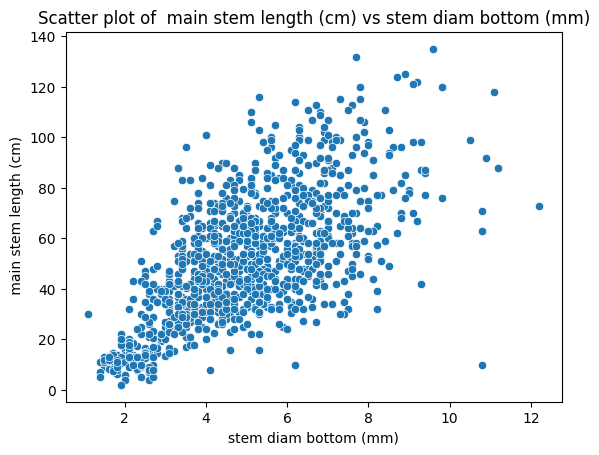

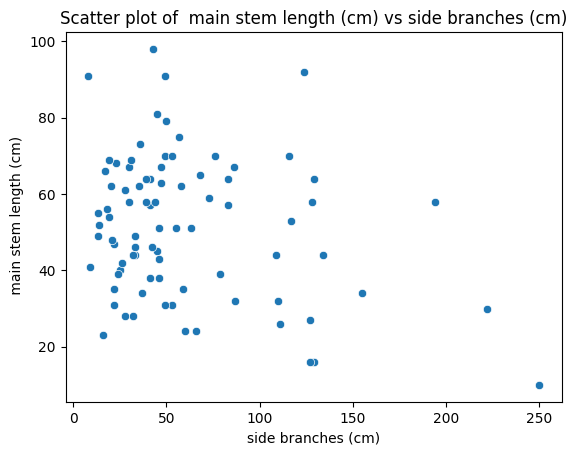

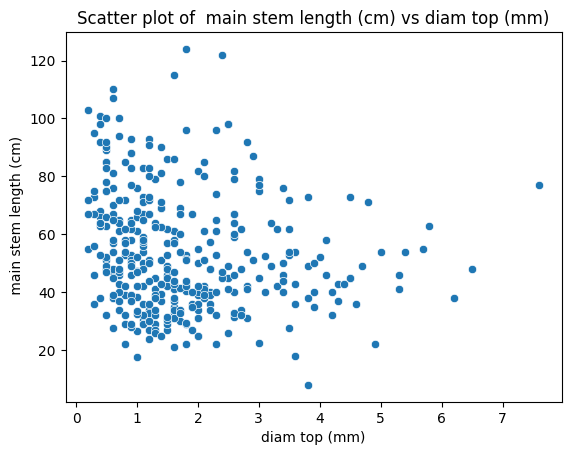

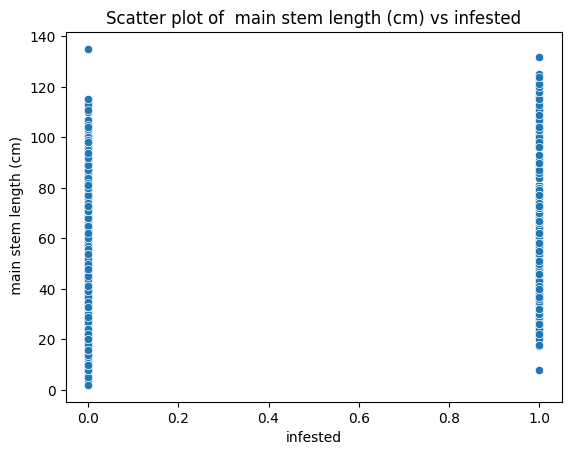

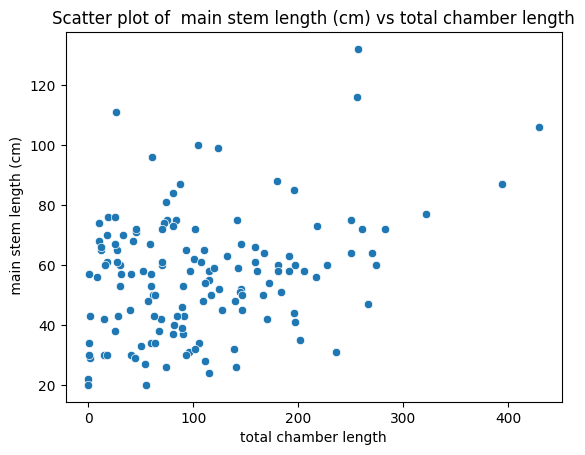

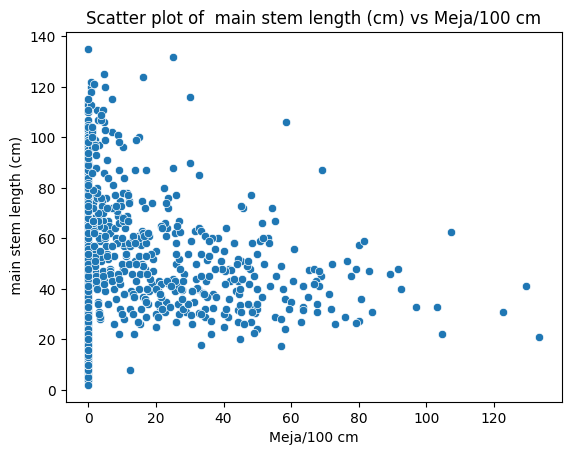

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.select_dtypes(include=['number'])
response = ' main stem length (cm)'
variables = ['stem diam bottom (mm)', 'side branches (cm)', 'diam top (mm)', 'infested', 'total chamber length', 'Meja/100 cm']

for v in variables:
    if v != response:
        sns.scatterplot(x=df[v], y=df[response])
        plt.title(f'Scatter plot of {response} vs {v}')
        plt.show()

## Data dictionary

In [8]:
datadictionarydf=pd.read_excel("../data/raw/metadata_dictionary.xlsx")
datadictionarydf

,Name,Description,Role,Type,Format
0,year,year that stems were infested,-,numeric,int64
1,diss date,date dissected in the laboratory,-,numeric,object
2,date,date collected in the field,-,numeric,object
3,site,six study sites at Hungry Valley study area,Predictor,nominal,object
4,trt,release or not in 2008 and 2014,-,nominal,object
5,BC,"1 = early establishment, 0 = late establishment",-,nominal,int64
6,stem #,stem ID,ID,numeric,int64
7,stem diam bottom (mm),diameter of stem at bottom,Predictor,numeric,float64
8,main stem length (cm),"length of stem, excluding side branches","Predictor, response",numeric,float64
9,total meja,"sum of no. empty chambers, dead larvae, dead p...",Predictor,numeric,int64
